# Extracting and analyzing crypto currency data

## Libraries and settings

In [1]:
# Libraries
import os
import time
import locale
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
locale.setlocale(locale.LC_ALL,"")

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define settings for graphics
# plt.style.use('dark_background')

from pycoingecko import CoinGeckoAPI
cg = CoinGeckoAPI()

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: u:\Lektionen\Scientific_Programming_FS2023\scientific_programming\Week_10\challenge


## Get data (multiple coins, time series)

In [2]:
# Define datetime
dt_start = '2021-01-01 00:00:00'
dt_end = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

# Convert the date string to a struct_time object
dt_start_struct = time.strptime(dt_start, '%Y-%m-%d %H:%M:%S')
dt_end_struct = time.strptime(dt_end, '%Y-%m-%d %H:%M:%S')

# Convert the struct_time object to a Unix timestamp
start = str(int(time.mktime(dt_start_struct)))
end = str(int(time.mktime(dt_end_struct)))

# Define the cryptocurrencies to retrieve price data for
cryptocurrencies = ['bitcoin', 'ethereum', 'dogecoin', 'near']

# Initialize the CoinGeckoAPI client
cg = CoinGeckoAPI()

# Retrieve price data for each cryptocurrency and save it in a data frame
dfs = []
for currency in cryptocurrencies:
    # Make the API request
    data = cg.get_coin_market_chart_range_by_id(
        id=currency,
        vs_currency='usd',
        from_timestamp=start,
        to_timestamp=end
    )
    
    # Extract the price data from the response
    prices = data['prices']
    
    # Convert the data to a pandas DataFrame
    df = pd.DataFrame(prices, columns=['timestamp', currency])
    
    # Convert the timestamp from UNIX to datetime format
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    # Set the timestamp as the index
    df.set_index('timestamp', inplace=True)
    
    # Append the DataFrame to the list of DataFrames
    dfs.append(df)

# Merge the DataFrames into a single DataFrame with a time series for each coin
df = pd.concat(dfs, axis=1)
df

,bitcoin,ethereum,dogecoin,near
timestamp,,,,
2021-01-01,29022.418395,738.616938,0.004707,1.394950
2021-01-02,29352.126792,730.147340,0.005538,1.354047
2021-01-03,32163.824935,777.696065,0.010603,1.410487
2021-01-04,33008.226203,967.000597,0.010087,1.474258
2021-01-05,31515.575967,1025.654768,0.009592,1.354361
...,...,...,...,...
2023-04-23,27861.640663,1877.541328,0.080553,1.951607
2023-04-24,27606.578348,1863.639142,0.078964,1.917058
2023-04-25,27511.635682,1842.630792,0.078879,1.884935


## Exploratory Data Analysis (EDA)

### Bar chart

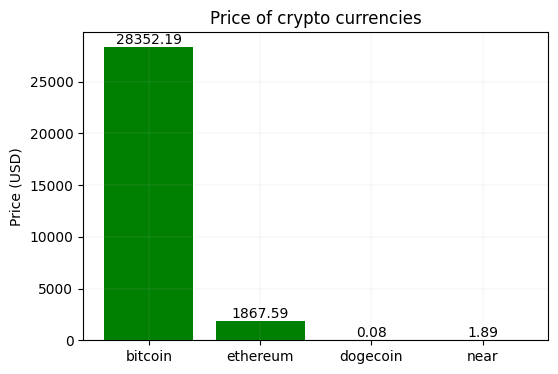

In [3]:
# Derive data
names = df.columns.tolist()
values = list(df.iloc[-1,0:4])

# Plot data
fig, ax = plt.subplots(figsize=(6,4))

bar_x          = names
bar_height     = values
bar_tick_label = names
bar_label      = ["%.2f" % i for i in values]

bar_plot = plt.bar(bar_x,bar_height,tick_label=bar_tick_label,color='green')
def autolabel(rects):
    for idx,rect in enumerate(bar_plot):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                bar_label[idx],
                ha='center', va='bottom', rotation=0)

autolabel(bar_plot)
plt.ylabel('Price (USD)')
plt.title('Price of crypto currencies')
plt.grid(linestyle='-', linewidth=0.1)

plt.show()

### Line chart (multiplot using .subplots())

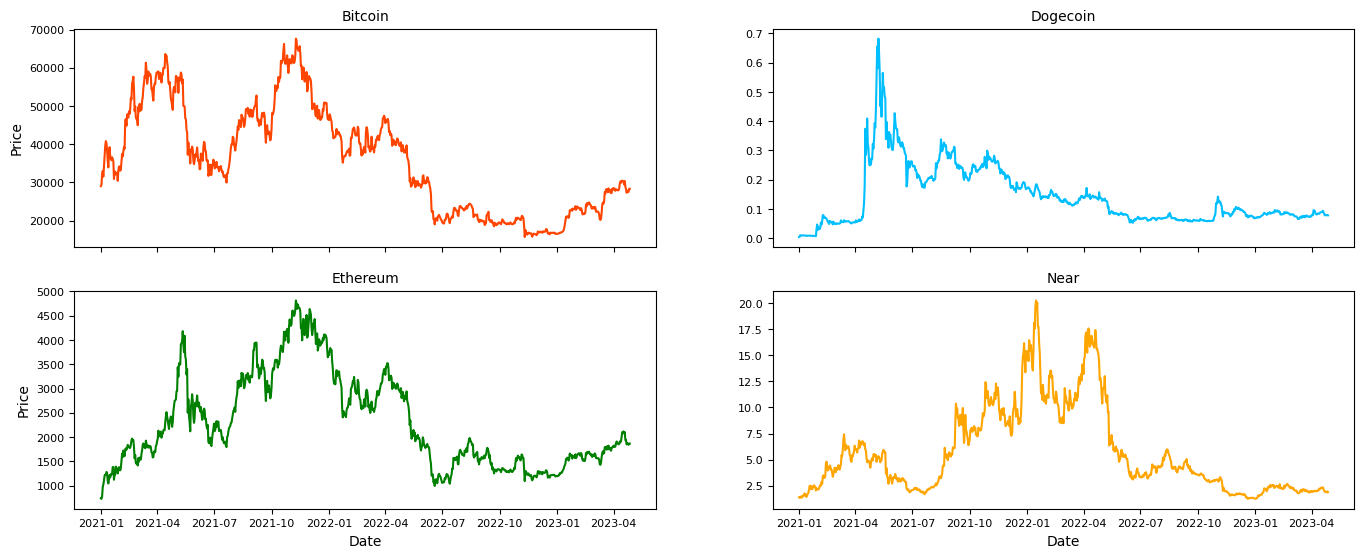

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(16,6), sharex=True, sharey=False)

ax[0, 0].plot(df.index, df['bitcoin'], color='orangered') # row=0, col=0
ax[1, 0].plot(df.index, df['ethereum'], color='green') # row=1, col=0
ax[0, 1].plot(df.index, df['dogecoin'], color='deepskyblue') # row=0, col=1
ax[1, 1].plot(df.index, df['near'], color='orange') # row=1, col=1

# Adding title
ax[0, 0].set_title('Bitcoin', fontsize = 10)
ax[1, 0].set_title('Ethereum', fontsize = 10)
ax[0, 1].set_title('Dogecoin', fontsize = 10)
ax[1, 1].set_title('Near', fontsize = 10)

# Adding x-labels
ax[0, 0].set_xlabel('', fontsize = 10)
ax[1, 0].set_xlabel('Date', fontsize = 10)
ax[0, 1].set_xlabel('', fontsize = 10)
ax[1, 1].set_xlabel('Date', fontsize = 10)

# Size of tick labels
ax[0, 0].tick_params(axis='both', which='major', labelsize=8)
ax[1, 0].tick_params(axis='both', which='major', labelsize=8)
ax[0, 1].tick_params(axis='both', which='major', labelsize=8)
ax[1, 1].tick_params(axis='both', which='major', labelsize=8)

# Adding y-labels
ax[0, 0].set_ylabel('Price', fontsize = 10)
ax[1, 0].set_ylabel('Price', fontsize = 10)
ax[0, 1].set_ylabel('', fontsize = 10)
ax[1, 1].set_ylabel('', fontsize = 10)

# Set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.2)

plt.show()

### Histogram

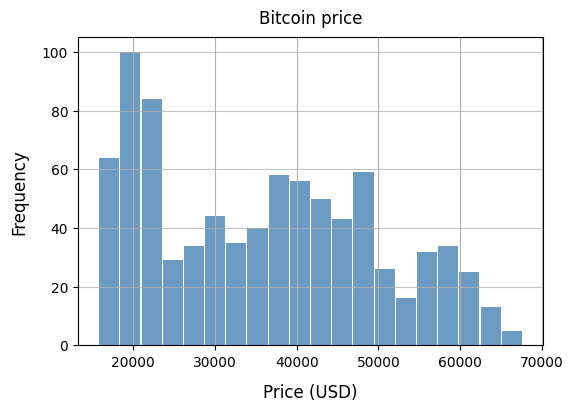

In [5]:
# Plot histogram
fig = plt.figure( figsize=(6,4) )
n, bins, patches = plt.hist(x=df['bitcoin'], 
                            bins=20, 
                            color='steelblue',
                            alpha=0.8, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Price (USD)', fontsize=12, labelpad=10)
plt.ylabel('Frequency', fontsize=12, labelpad=10)
plt.title('Bitcoin price', fontsize=12, pad=10)
plt.show()

### Boxplot

<Axes: xlabel='bitcoin'>

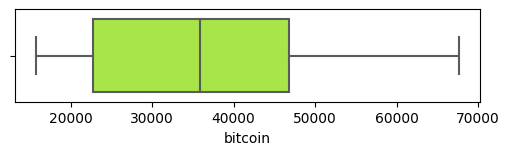

In [6]:
# Plot boxplot
plt.figure(figsize=(6,1.2))
sns.boxplot(x=df['bitcoin'], color="greenyellow")

### Scatterplot

11.223586113660607
10325.844654532264


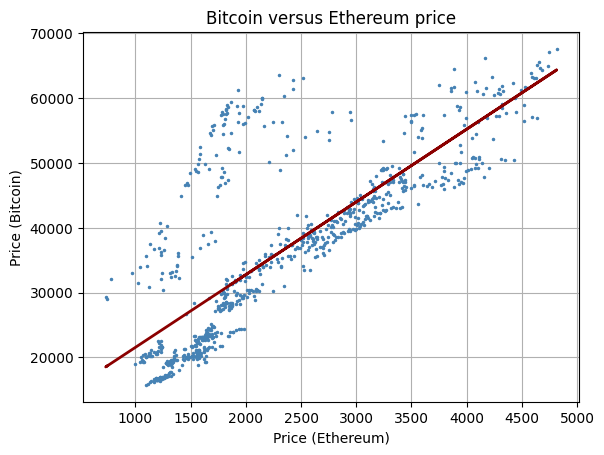

In [7]:
# Scatterplot
plt.plot(df['ethereum'], df['bitcoin'], 'o', markersize=1.5, c='steelblue')

# Regression line (b = slope, a=intercept)
b, a = np.polyfit(df['ethereum'], df['bitcoin'], 1)
print(b)
print(a)

# Plot regression line
plt.plot(df['ethereum'], 
         b*df['ethereum'] + a,
         linewidth=2, 
         c='darkred')
plt.xlabel('Price (Ethereum)')
plt.ylabel('Price (Bitcoin)')
plt.title('Bitcoin versus Ethereum price')
plt.grid()

plt.show()

### Scatterplot-Matrix

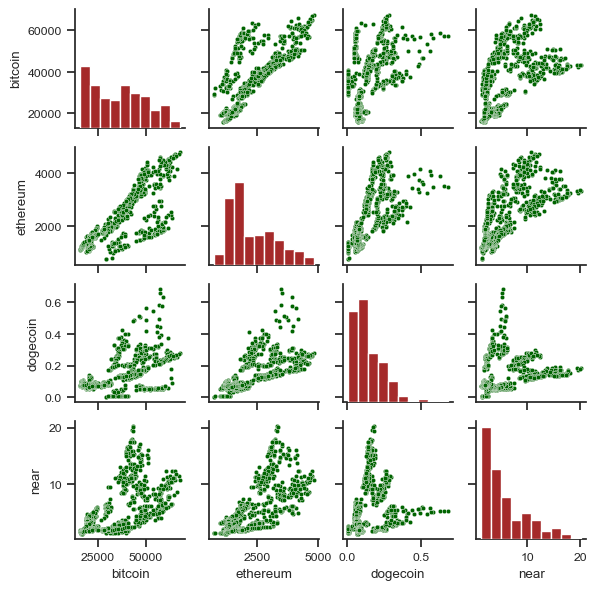

In [8]:
# Change seaborn settings
sns.set(style="ticks", font_scale=0.8)

# Plot
g = sns.PairGrid(df, 
                 height=1.5, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')
plt.show()

### Heatmap with correlation matrix

Correlation matrix
           bitcoin  ethereum  dogecoin      near
bitcoin   1.000000  0.780334  0.535889  0.541351
ethereum  0.780334  1.000000  0.689332  0.706040
dogecoin  0.535889  0.689332  1.000000  0.223571
near      0.541351  0.706040  0.223571  1.000000


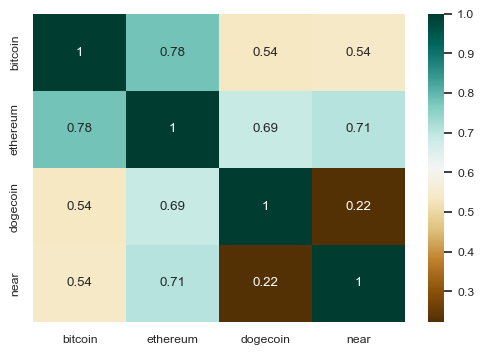

In [9]:
# Change font size of annotations
sns.set(font_scale=0.8)

# Correlation matrix
corr = df.corr()
print('Correlation matrix')
print(corr)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(corr, cmap="BrBG", annot=True)
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [10]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-04-27 20:50:02
Python Version: 3.10.9
-----------------------------------
